## CNN (Convolutional Neural Network) 합성곱 신경망

- 컴퓨터 비전분야에서 대표적으로 사용되는 딥러닝 모델
- 특히 이미지를 분류해내는데 좋은 성능을 가지고 있음. 최근 자율주행 자동차 및 얼굴 인식 등 이미지를 판별해야 하는 분야에서 많이 사용함


### CNN 역사

- 고양이 실험(1958): David Hubel과 Torseten Wiesel은 1958년과 59년에 진행된 시각 피질의 구조에 대한 결정적 통찰을 제공한 고양이 실험에서의 고수준의 뉴런이 저수준의 뉴런의 출력에 기반한다는 아이디어에서 출발함

- LeNet(1998): 1998년 Yann Lecn et al.의 'Gradient-based learning applied to document recognition'의 LeNet이 나오면서 CNN의 본격적인 구조가 탄생. LeNet은 CNN의 기반을 구성함 

- AlexNet(2012): AlexNet은 CNN의 구조를 담고있는 뉴럴넷으로 LeNet-5와 유사하지만 병렬적인 구조로 설계됨. AlexNet은 병렬적 구조를 제외하고는 LeNet-5와 유사한 형태로 나타남. AlexNet은 총 8개의 layer로 구성되었으며 8개의 layer는 5개의 convolution layer와 3개의 fully connected layer로 구성되었음.

- VGGNett(2014): 모델의 제목에서 유추할수 있듯이 모델의 lyaer를 많이 쌓을 수록 CNN 모델의 성능에 어떠한 영향을 미치는지에 대해 집중하여 ILSVRC에서 준우승을 차지한 모델임

- GoogLeNet(2014): VGGNet이 ILSVTC에서 준우승을 차지했다면, GoogLeNet의 경우 동일 대회에서 우승을 차지한 모델로써 VGGNet과 유사하게 22개의 layer를 쌓음으로써 CNN을 좀더 deep하게 만듦. GoogLeNet은 기계의 자원을 효율적으로 이용하면서 학습 능력을 극대화 할 수 있는 deep 한 CNN모델을 설계하는 것에 초점을 맞춤

- ResNet(2015): 2014년에는 CNN의 layer가 깊게 설계된 모델이 주목을 받음. ResNet은 residual learning, shortcut, identity mapping 과 같이 이전의 CNN 구조에서 찾기 힘든 용어를 사용하며, 152의 layer의 구조를 갖고있는 모델임. ResNet 실험팀은 layer를 deep하게 설계하면서 학습성능을 높을수 있는 방법을 고민한 결과 residual learning을 발표함

### CNN 모델 개념

### 1) 합성곱 Convolution 연산
합성곱 필터로 불리는 특정 크기의 행렬을 이미지 데이터(또는 문장데이터)행렬에 슬라이딩하면서 곱하고 더하는 연산 (= 마스크, 윈도우 Window, 커널 Kernel, 필더 Filter) 

*사용하는 이유: 이미지의 크기(예: 6x6)을 축소(예: 4x4로)할 수 있기 때문
*픽셀은 입력값, 필터값은 가중치

- 필터 크기(마스크)와 패딩, 스트라이드 값에 따라 특징맵 크기가 달라짐
    - 패딩과 스트라이드값에 따라 케라스에서는 출력 크기를 알아서 계산해줌
    

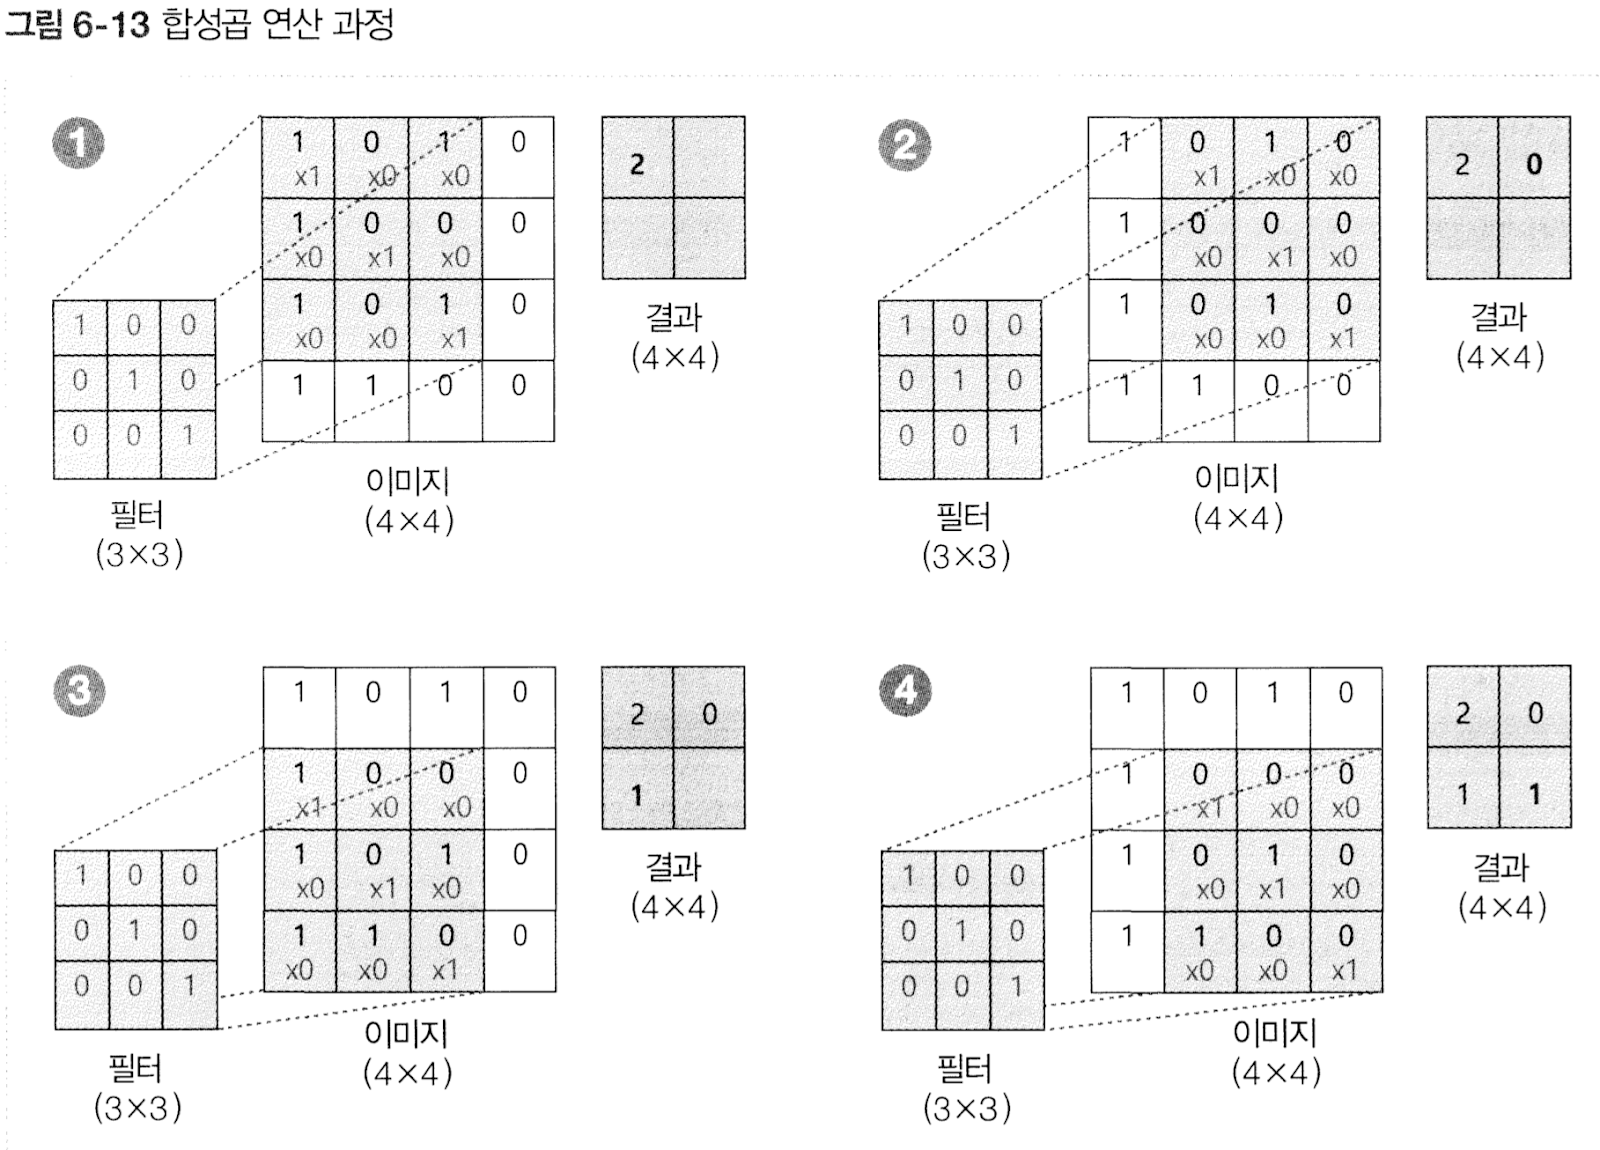

In [6]:
from IPython.display import Image
Image('Data/230626/1.png', width = '700')

그림 6-13 합성곱 연산과정
- 이미지 좌상단에 이미지값과 필터를 포개고, 대응되는 숫자끼리 곱한 뒤 모든 숫자를 더해줌
- 스트라이드: 필터 위치를 몇 칸씩 이동할지 결정하는 값
- 슬라이딩: 필터가 이미지 데이터 행렬 위를 상하좌우로 이동하는 동작
- 특징맵(Feature Map): 합성곱 연산은 필터가 더 이상 슬라이딩 할 수 없을 때까지 반복하여, 최종적으로 나온 결과
- 패딩: 주로 출력 크기를 조정할 목적으로 사용하며, 패딩 처리된 영역은 0으로 채워짐. 
    - 입력층의 데이터와 동일한 행렬크기로 다음 층으로 전달하기 위해서 사용

### 2) 풀링 Pooling

합성곱 연산 결과로 나온 특징맵의 크기를 줄이거나 주요한 특징을 추출하기 위해 사용하는 연산

최대 풀링과 평균 풀링연산이 있으며, 주로 최대 풀링 연산을 사용함

최대 풀링: 각 합성곱 연산으로부터 얻은 결과 벡터에서 가장 큰 값을 가진 스칼라 값을 빼내는 연산

### 참고: csv파일 (Comma-Seperated Values)

- 몇 가지 필드를 쉼표(,)로 구분한 텍스트 데이터 및 텍스트 파일
- ChatbotData.csv 데이터를 엑셀로 열었을 때, 한글이 깨질 때: 메모장으로 열기 > 다른이름으로 저장 > 인코딩방식 변경 후 저장

In [56]:
import pandas as pd
df = pd.read_csv('Data/230626/Chatbot_data-master/ChatbotData.csv')
df.head(3)

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0


### [예제3] 문장 감정분류 CNN모델

In [57]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import preprocessing
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, Conv1D, GlobalMaxPool1D, concatenate

# 데이터읽기
train_file = 'Data/230626/Chatbot_data-master/ChatbotData.csv'
data = pd.read_csv(train_file, delimiter=',')
features = data['Q'].tolist()
labels = data['label'].tolist()

In [58]:
data.head(3)   # Q: 질문, A: 답변, Label: 감정

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0


In [62]:
data.label.value_counts()     # 0: 일상다반사 / 1: 부정 / 2: 긍정

label
0    5290
1    3570
2    2963
Name: count, dtype: int64

In [11]:
# 문장을 단어 시퀀스로 만들기 (단어 토큰들의 순차적 리스트) : text.text_to_word_sequence
corpus = [preprocessing.text.text_to_word_sequence(text) for text in features]

# 모든 단어를 시퀀스 번호로 변환함
tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)

word_index = tokenizer.word_index

In [39]:
from itertools import islice

corpus[:10], sequences[:10], dict(islice(word_index.items(),10))

([['12시', '땡'],
  ['1지망', '학교', '떨어졌어'],
  ['3박4일', '놀러가고', '싶다'],
  ['3박4일', '정도', '놀러가고', '싶다'],
  ['ppl', '심하네'],
  ['sd카드', '망가졌어'],
  ['sd카드', '안돼'],
  ['sns', '맞팔', '왜', '안하지ㅠㅠ'],
  ['sns', '시간낭비인', '거', '아는데', '매일', '하는', '중'],
  ['sns', '시간낭비인데', '자꾸', '보게됨']],
 [[4646, 4647],
  [4648, 343, 448],
  [2580, 803, 11],
  [2580, 804, 803, 11],
  [4649, 2581],
  [2582, 4650],
  [2582, 64],
  [805, 4651, 14, 4652],
  [805, 4653, 3, 502, 238, 45, 106],
  [805, 4654, 23, 4655]],
 {'너무': 1,
  '좋아하는': 2,
  '거': 3,
  '싶어': 4,
  '같아': 5,
  '안': 6,
  '나': 7,
  '좀': 8,
  '사람': 9,
  '내가': 10})

In [40]:
# 시퀀스벡터 패딩 처리: pad_sequences 
MAX_SEQ_LEN = 15   # 단어 시퀀스 벡터 크기 일정하게 맞춰줌 (남는 공간은 0으로 채움: 패딩처리)
padded_seqs = preprocessing.sequence.pad_sequences(sequences, maxlen = MAX_SEQ_LEN, padding = 'post')

In [41]:
padded_seqs

array([[ 4646,  4647,     0, ...,     0,     0,     0],
       [ 4648,   343,   448, ...,     0,     0,     0],
       [ 2580,   803,    11, ...,     0,     0,     0],
       ...,
       [13395,  2517,    89, ...,     0,     0,     0],
       [  147,    46,    91, ...,     0,     0,     0],
       [  555, 13398,     0, ...,     0,     0,     0]])

In [42]:
# 학습용, 검증용, 테스트용 데이터셋 생성 7:2:1
ds = tf.data.Dataset.from_tensor_slices((padded_seqs, labels)) 
# 패딩 처리된 시퀀스(padded_seqs) 벡터리스트와 감정(labels)리스트 전체를 데이터셋 객체로 만듦

ds = ds.shuffle(len(features))   # 랜덤하게 섞음

train_size = int(len(padded_seqs) * 0.7)
val_size = int(len(padded_seqs) * 0.2)
test_size = int(len(padded_seqs) * 0.1)

train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).take(val_size).batch(20)
test_ds = ds.skip(train_size + val_size).take(test_size).batch(20)

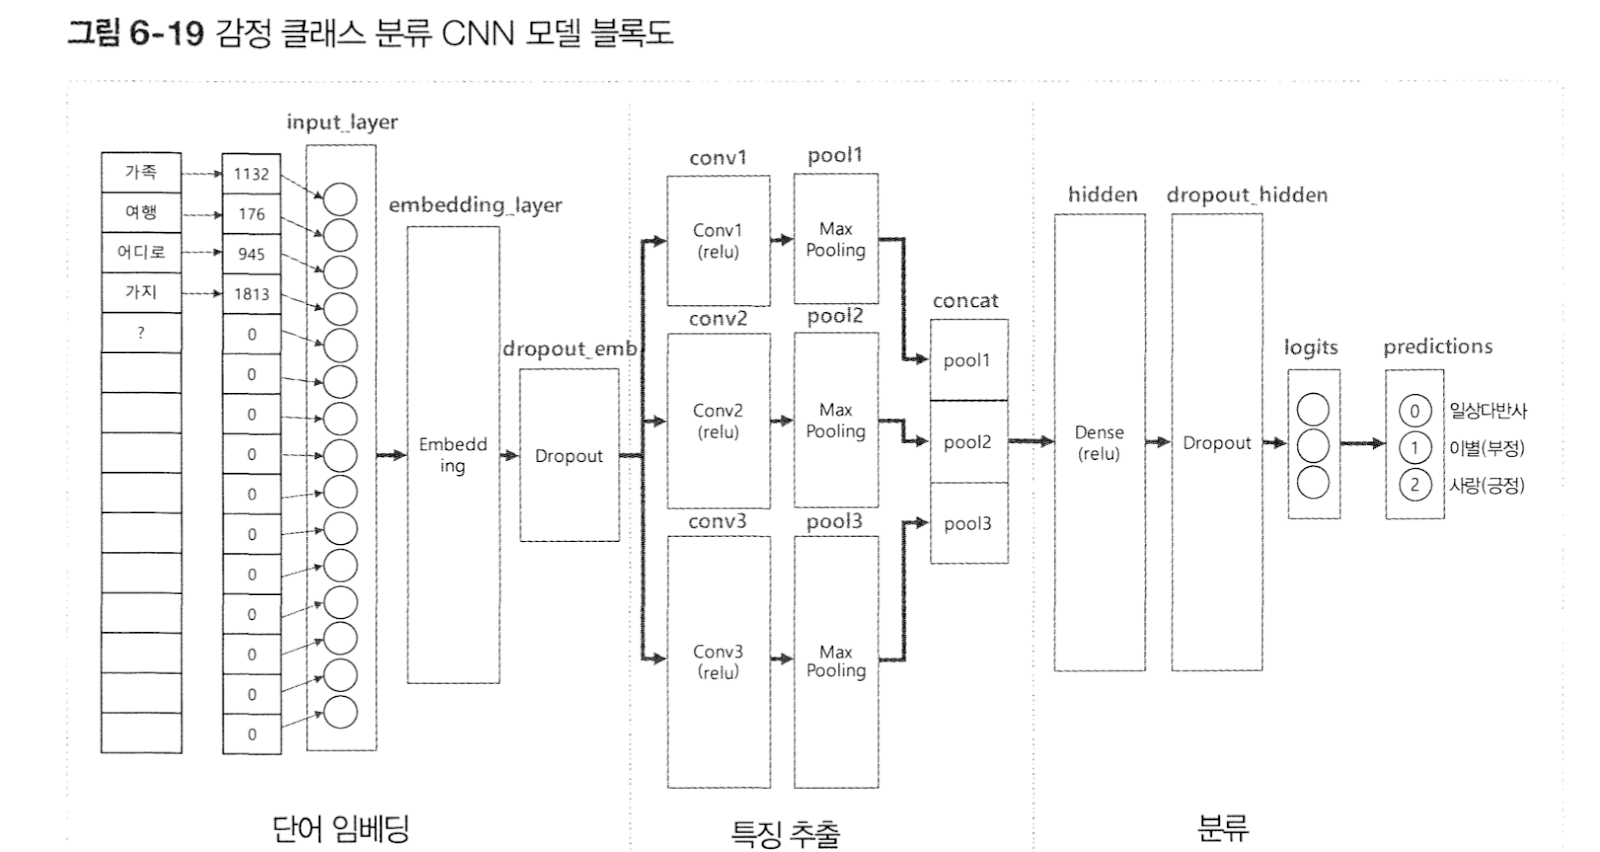

In [46]:
Image('Data/230626/2.png', width = 800)

In [47]:
#### CNN모델 정의  케라스 함수형 모델 방식으로 구현

# 하이퍼파라미터 설정
EMB_SIZE = 128                     # 임베딩 결과로 나올 밀집 벡터의 크기
EPOCH = 5        
VOCAB_SIZE = len(word_index) + 1   # 전체단어 갯수
dropout_prob = 0.5                 # 50%의 확률로 DROPOUT을 생성 (오버피팅 방지를 위함)

# 입력 계층 만들기: 패딩 처리된 시퀀스 벡터 크기로 설정
input_layer = Input(shape = (MAX_SEQ_LEN,))

# 임베딩 계층 만들기: 희소벡터를 밀집벡터로 변환 
embedding_layer = Embedding(VOCAB_SIZE, EMB_SIZE, input_length = MAX_SEQ_LEN)(input_layer) 

# 드롭아웃
dropout_emb = Dropout(rate = dropout_prob)(embedding_layer)

In [49]:
# 임베딩 벡터에서 크기가 3,4,5인 합성곱 필터를 128개씩 사용하여 생성: Conv1D
# 최대풀링 연산: GlobalMaxPool1D

conv1 = Conv1D(
    filters = 128,                         # 합성곱 필터 개수  
    kernel_size = 3,                       # 합성곱 필터 크기
    padding = 'valid',
    activation = tf.nn.relu)(dropout_emb)
pool1 = GlobalMaxPool1D()(conv1)

conv2 = Conv1D(
    filters = 128,
    kernel_size = 4, 
    padding = 'valid',
    activation = tf.nn.relu)(dropout_emb)
pool2 = GlobalMaxPool1D()(conv2)

conv3 = Conv1D(
    filters = 128,
    kernel_size = 5, 
    padding = 'valid',
    activation = tf.nn.relu)(dropout_emb)
pool3 = GlobalMaxPool1D()(conv3)

# 3,4,5-gram 이후 합치기
concat = concatenate([pool1, pool2, pool3])

In [50]:
# 완전연결계층 구현

hidden = Dense(128, activation = tf.nn.relu)(concat)
dropout_hidden = Dropout(rate = dropout_prob)(hidden)
logits = Dense(3, name = 'logits')(dropout_hidden)       # 로짓: 점수

# 감정클래스별 확률 계산
predictions = Dense(3, activation = tf.nn.softmax)(logits)    # 확률값 계산 위해 softmax함수 필요

In [51]:
# 모델생성
model = Model(inputs = input_layer, outputs = predictions)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# 손실함수: sparse_categorical_crossentropy 

In [52]:
# 모델 학습
model.fit(train_ds, validation_data = val_ds, epochs = EPOCH, verbose= 1)
# verbose: 학습진행과정 보여줌. 0은 미출력, 1은 자세히, 2는 함축적인 정보

Epoch 1/5
414/414 [==============================] - 13s 28ms/step - loss: 0.9090 - accuracy: 0.5739 - val_loss: 0.6854 - val_accuracy: 0.7348
Epoch 2/5
414/414 [==============================] - 12s 28ms/step - loss: 0.5898 - accuracy: 0.7745 - val_loss: 0.3297 - val_accuracy: 0.8879
Epoch 3/5
414/414 [==============================] - 12s 28ms/step - loss: 0.3489 - accuracy: 0.8800 - val_loss: 0.1850 - val_accuracy: 0.9387
Epoch 4/5
414/414 [==============================] - 12s 28ms/step - loss: 0.2129 - accuracy: 0.9299 - val_loss: 0.1180 - val_accuracy: 0.9628
Epoch 5/5
414/414 [==============================] - 13s 32ms/step - loss: 0.1620 - accuracy: 0.9522 - val_loss: 0.0742 - val_accuracy: 0.9776


In [53]:
# 모델 평가 
loss, accuracy = model.evaluate(test_ds, verbose = 1)
print('Accuracy: %f' %(accuracy * 100))
print('loss: %f' %(loss))

60/60 [==============================] - 0s 1ms/step - loss: 0.0646 - accuracy: 0.9772
Accuracy: 97.715735
loss: 0.064571


In [ ]:
# 모델 저장
model.save('Data/230626/cnn_model.h5')

## Convolution NN (self)

https://blog.naver.com/PostView.naver?blogId=beyondlegend&logNo=222256886960&parentCategoryNo=&categoryNo=93&viewDate=&isShowPopularPosts=false&from=postList

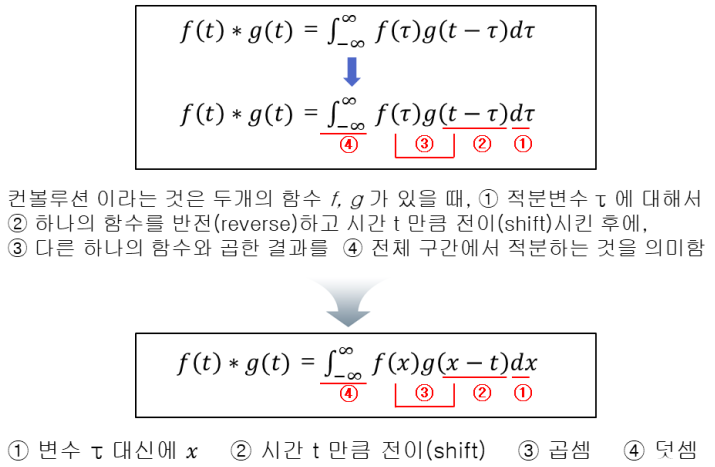

In [71]:
Image('Data/230626/0.png', width = 600)

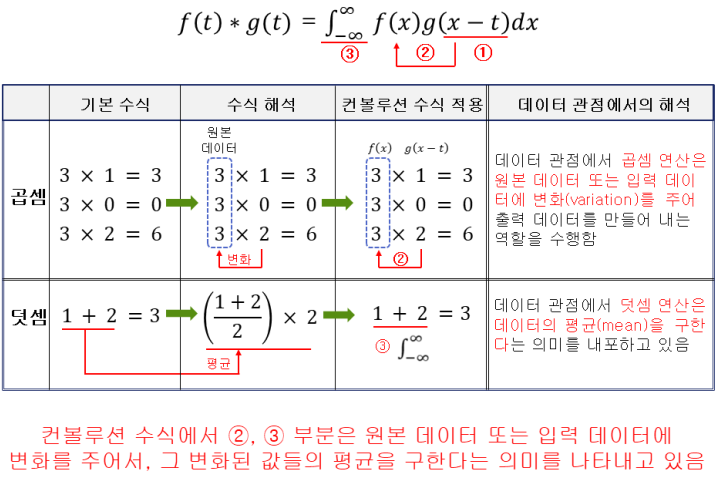

In [72]:
Image('Data/230626/0.1.png', width = 600)

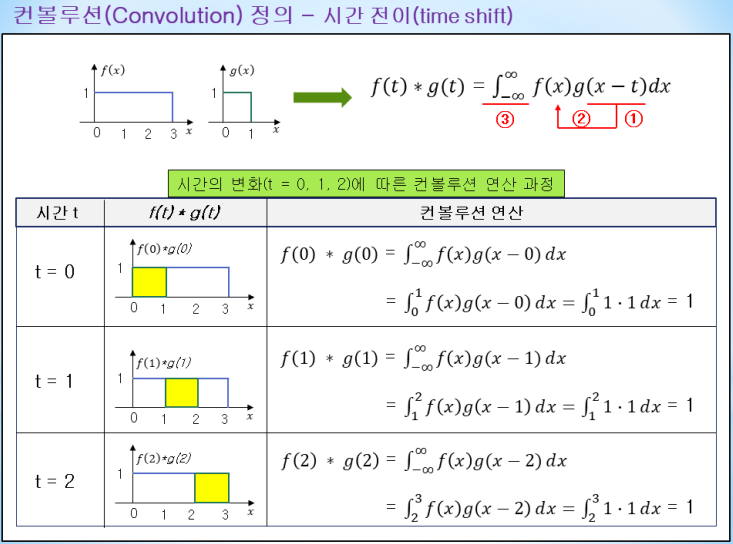

In [73]:
Image('Data/230626/0.2.png', width = 600)

t = 0 : 시간에 변화가 없다면, 함수 f와 함수 g는 원래 함수 그대로, 0~1 사이 적분

t = 1 : 1초 흐른 경우, 함수 f는 그대로, 함수 g는 시간 1만큼 오른쪽으로 이동(g(x-1)), 1~2 사이 적분

t = 2 : 2초 흐른 경우, 함수 f는 그대로, 함수 g는 시간 2만큼 오른쪽으로 이동(g(x-1)), 2~3 사이 적분

#### 컨볼루션: 시간의 흐름에 따라 데이터 $g(x)$가 이동하면서, 입력데이터 $f(x)$를 평균적으로 얼마나 변화시키는지 나타냄
#### = 시간의 흐름에 따라 움직이는 데이터 $g(x)$에 의해서, 입력데이터 $f(x)$가 평균적으로 얼마나 변화시키는지 나타냄

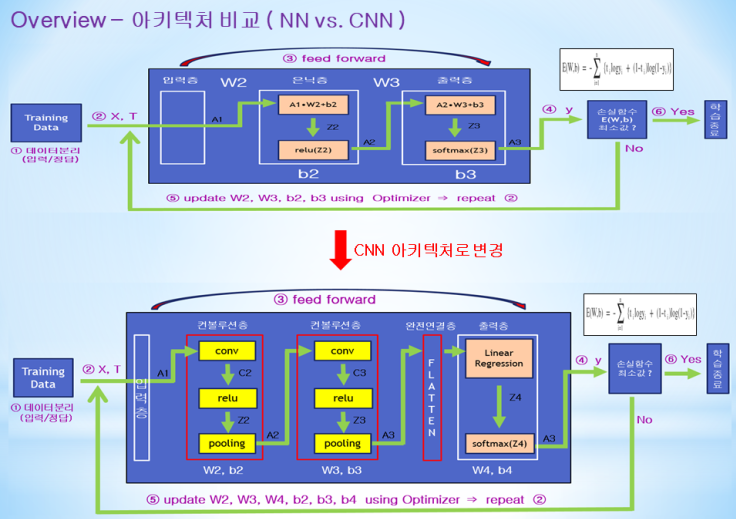

In [64]:
Image('Data/230626/3.png', width = 800)

#### Convolution

- 입력데이터(A1, A2, ...)와 가중치들의 집합체인 다양한 필터와의 연산을 통해 입력데이터의 특징(feature) 추출하는 역할
    - A1 * filter_1 + b2 >>>> 입력데이터 A1의 특징 추출
    - A2 * filter_1 + b3 >>>> 입력데이터 A1의 특징 추출
    
#### Pooling
- 입력정보를 최대값/최소값/평균값 등으로 압축하여 데이터 연산량을 줄여줌 (하나만 뽑음)

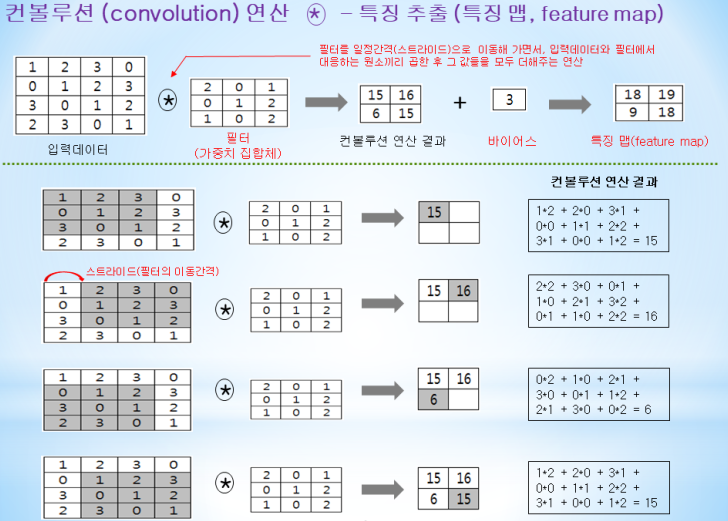

In [66]:
Image('Data/230626/4.png', width = 800)

#### Convolution 연산

- 필터의 window를 stride라고 불리는 일정 간격으로 이동해가면서 입력 데이터에 적용하는 과정
    - window: 그림에서 회색으로 표현된 3 X 3 부분. 입력데이터와 대응되는 원소끼리 곱한 후 그 총합을 구함

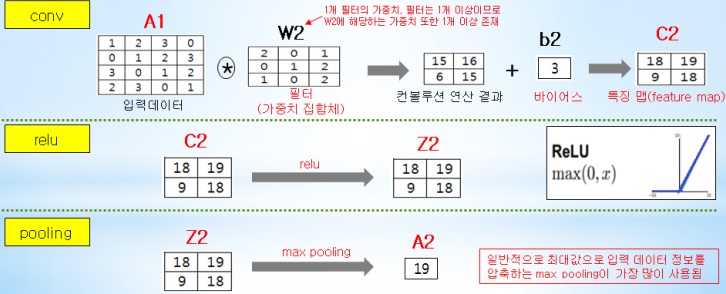

In [68]:
Image('Data/230626/5.png', width = 800)

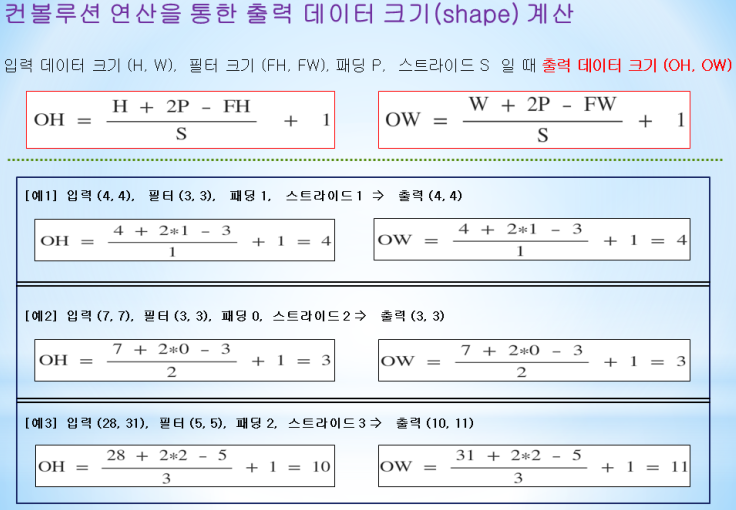

In [69]:
Image('Data/230626/6.png', width = 800)

이미지를 분류하기 위해 사용되는 일반적인 컨볼루션 신경망 구조는, Flat Layer 기준으로 특징 추출기인 Feature Extractor와 분류기인 Classifier가 합쳐져 있는 형태임

#### 1. Feature Extractor 특징추출기: 컨볼루션 레이어와 풀링 레이어의 다양한 조합으로 구성, 이미지데이터 특징 추출 및 압축
    1) Convolutional Layer 합성곱 층
        - API는 conv2d 필터 사용
        - 첫번째 컨볼루션 층: 높이, 너비, 채널 형태의 텐서로 주어지는 input_shape 파라미터를 사용
        - 두번째 컨볼루션 층 이후부터는 input_shape을 사용하지 않음
        - kernel_size, filters만 필수 파라미터
        - stride, activation, padding 등은 옵션임
    
    2) Pooling Layer
        - Polling 층: 데이터의 공간적 특성을 유지하면서 크기를 줄여주는 층, 연속적 합성곱층 사이에 주기적으로 넣어줌. 
        - API는 보통 maxpool2d 필터 사용
        - pool_size = (2,2): 높이 2, 너비 2 사각형 안에서 최대값만 남기는 연산을 수행하라
    
    
#### 2. Classifier 분류기: 완전연결층인 Dense Layer와 오버피팅을 방지하기 위한 Dropout Layer 등의 다양한 조합으로 구성, 정답 분류
    3) Falttening Layer
        - 추출된 특성을 Output layer에 연결하여 분류하기 위함
        - Flattening layer 이후로는 일반 신경망 모델과 동일
        
#### CNN의 기본 골격

input → padding → convolutional layer → pooling → convolutional layer → pooling → ...  → flattening  → output

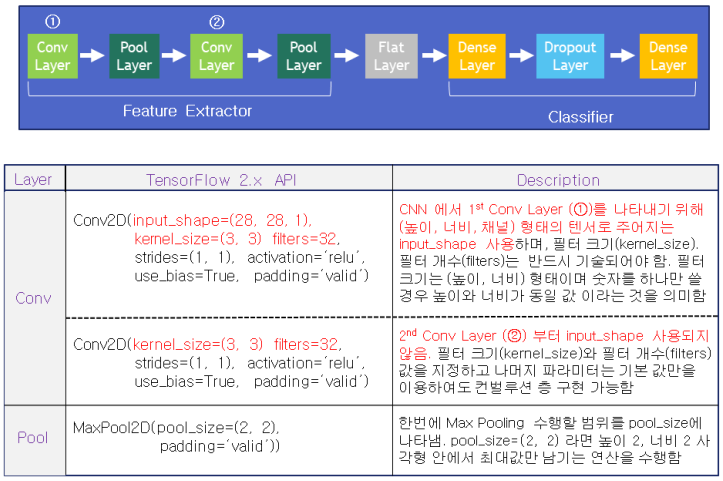

In [77]:
Image('Data/230626/7.png', width = 800)

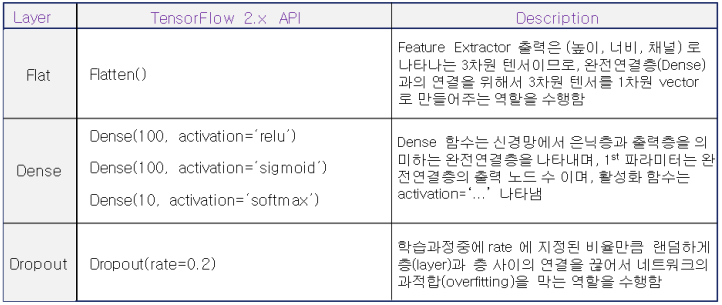

In [78]:
Image('Data/230626/8.png', width = 800)

- tensorflow의 karas에는 1d, 2d, 3d 함수가 구분되어 있는데, 이는 필터의 진행방향 차원수를 의미함 (입력데이터의 차원수가 아님)

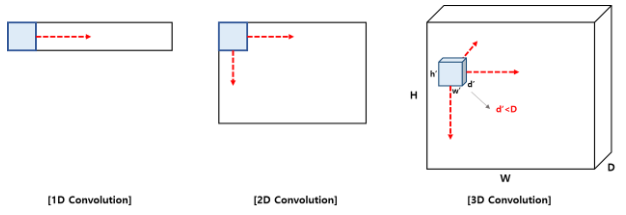

In [79]:
Image('Data/230626/9.png', width = 800)

### [실습1] 예제3 변형

합성곱 필터크기, 필터개수, 단어 임베딩 벡터 크기, 에포크 값을 늘려가며 모델 생성

용량이 큰 모델일수록 Accuracy 가 높음

### [실습2] 예제4 (cnn모델 사용) 변형

In [91]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import preprocessing
from tensorflow.keras.models import Model, load_model

# 데이터읽기
train_file = 'Data/230626/Chatbot_data-master/ChatbotData.csv'
data = pd.read_csv(train_file, delimiter=',')
features = data['Q'].tolist()
labels = data['label'].tolist()

# 단어 인덱스 시퀀스 벡터
corpus = [preprocessing.text.text_to_word_sequence(text) for text in features]
tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
word_index = tokenizer.word_index

MAX_SEQ_LEN = 15   # 단어 시퀀스 벡터 크기
padded_seqs = preprocessing.sequence.pad_sequences(sequences, maxlen = MAX_SEQ_LEN, padding = 'post')

# 테스트용 데이터셋 생성 7
ds = tf.data.Dataset.from_tensor_slices((padded_seqs, labels))
ds = ds.shuffle(len(features))
test_ds = ds.take(2000).batch(20)

In [92]:
# 감정분류 CNN모델 불러오기  
model = load_model('Data/230626/cnn_model.h5')
model.summary()
model.evaluate(test_ds, verbose = 2)

# 테스트용 데이터셋의 10212번째 데이터 출력
print('단어 시퀀스: ', corpus[10212])
print('단어 인덱스 시퀀스: ', padded_seqs[10212])
print('문장 분류(정답): ', labels[10212])

# 테스트용 데이터셋의 10212번째 데이터 감정 예측
picks = [10212]
predict = model.predict(padded_seqs[picks])
predict_class = tf.math.argmax(predict, axis = 1)
print("감정 예측 점수: ", predict)
print("감정 예측 클래스: ", predict_class.numpy())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 15)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 15, 128)      1715072     ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 15, 128)      0           ['embedding[0][0]']              
                                                                                                  
 conv1d (Conv1D)                (None, 13, 128)      49280       ['dropout[0][0]']                
                                                                                              

In [93]:
# 감정분류 CNN모델 불러오기
model = load_model('Data/230626/cnn_model_v2.h5')
model.summary()
model.evaluate(test_ds, verbose = 2)

# 테스트용 데이터셋의 10212번째 데이터 출력
print('단어 시퀀스: ', corpus[10212])
print('단어 인덱스 시퀀스: ', padded_seqs[10212])
print('문장 분류(정답): ', labels[10212])

# 테스트용 데이터셋의 10212번째 데이터 감정 예측
picks = [10212]
predict = model.predict(padded_seqs[picks])
predict_class = tf.math.argmax(predict, axis = 1)
print("감정 예측 점수: ", predict)
print("감정 예측 클래스: ", predict_class.numpy())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 15)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 15, 256)      3430144     ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 15, 256)      0           ['embedding[0][0]']              
                                                                                                  
 conv1d (Conv1D)                (None, 11, 256)      327936      ['dropout[0][0]']                
                                                                                              

In [96]:
# 감정분류 CNN모델 불러오기
model = load_model('Data/230626/cnn_model_v3.h5')
model.summary()
model.evaluate(test_ds, verbose = 2)

# 테스트용 데이터셋의 10212번째 데이터 출력
print('단어 시퀀스: ', corpus[10212])
print('단어 인덱스 시퀀스: ', padded_seqs[10212])
print('문장 분류(정답): ', labels[10212])

# 테스트용 데이터셋의 10212번째 데이터 감정 예측
picks = [10212]
predict = model.predict(padded_seqs[picks])
predict_class = tf.math.argmax(predict, axis = 1)
print("감정 예측 점수: ", predict)
print("감정 예측 클래스: ", predict_class.numpy())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 15)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 15, 512)      6860288     ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 15, 512)      0           ['embedding[0][0]']              
                                                                                                  
 conv1d (Conv1D)                (None, 9, 512)       1835520     ['dropout[0][0]']                
                                                                                              